<a href="https://colab.research.google.com/github/guilhermersduarte/EDA_A-7/blob/main/AED_8_Praticando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Informação Mútua: Feature Selection
---


Na Análise Exploratória de Dados uma das análises mais importantes é  determinar o que o valor de um atributo pode dizer sobre os valores de outro. Isso tem uma série de aplicações, em particular para a seleção de atributos para o aprendizado de máquina. Tratamos isso no nosso Professsor Resolve, e no material da aula você encontra como empregar a informação mútua para selecionar os atributos mais relevantes para determinar uma classe em R (Aula 8, Feature Selection).

Este exemplo mostra como fazer isso em Python.



## Atividade

Empregue o exemplo para fazer uma seleção de atributos de classificação (atributos relevantes para a determinação de uma classe) de um conjunto de dados de interesse e compartilhe com os seus colegas no fórum.

Você ainda pode buscar por outros exemplos na internet de outras técnicas de seleção de features, incluindo seleção de features para regressão (em vez de classificação como apresentamos aqui). Neste caso não deixe explicar um pouco da técnica empregada e indicar as referências empregadas. ;-)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import feature_selection

In [2]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
mutual = feature_selection.mutual_info_classif(iris.drop(columns='species'), iris.species)

mutual


array([0.47667449, 0.21898626, 1.00197119, 0.97017367])

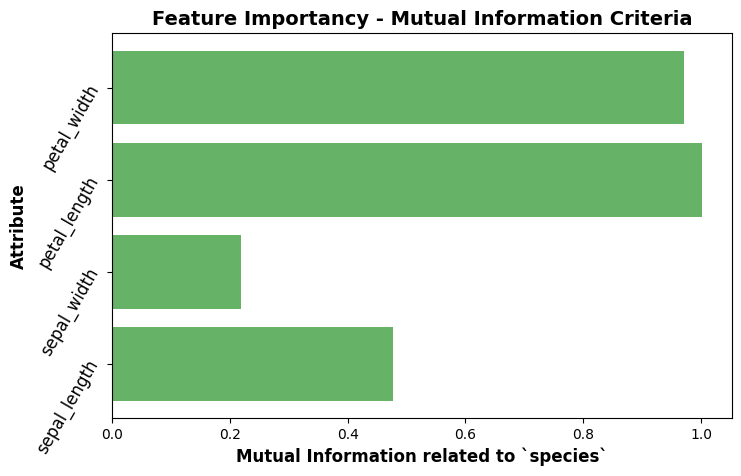

In [4]:
f = plt.figure(figsize=(8,5))

plt.barh( iris.columns[0:4], mutual[0:4], color='g', alpha=0.6 )
plt.title('Feature Importancy - Mutual Information Criteria', fontsize=14, weight='bold')
plt.yticks(fontsize=12, rotation=60)
plt.xlabel('Mutual Information related to `species`', fontsize=12, weight='bold')
plt.ylabel('Attribute', fontsize=12, weight='bold')
plt.show()



1. Teste Chi-Quadrado (χ
2
 )
Uso:
O Teste Chi-Quadrado é usado para avaliar a dependência entre duas variáveis categóricas. No contexto de seleção de atributos, ele nos ajuda a determinar se um atributo categórico é independente da variável alvo categórica. Valores altos de χ
2
  e p-valores baixos indicam que o atributo e a classe são dependentes, ou seja, o atributo é relevante para a classificação.

Observação para o Iris Dataset:
Os atributos do Iris Dataset são numéricos (contínuos). O Teste Chi-Quadrado, em sua forma padrão, é para variáveis categóricas. Para aplicá-lo aqui, os atributos numéricos precisariam ser discretizados (transformados em categóricos/bins). No entanto, a função chi2 do scikit-learn pode ser aplicada a atributos não-negativos numéricos (geralmente contagens ou frequências) e alvos categóricos, interpretando-os de forma a calcular a estatística Chi-Quadrado. Para dados verdadeiramente contínuos como o Iris, ANOVA F-value é geralmente mais apropriada. Mesmo assim, vamos demonstrar a aplicação.

In [6]:
# Teste Chi-Quadrado (X deve ser não-negativo, y categórico)
# Como X (atributos do Iris) são floats, uma abordagem real seria discretizá-los primeiro.
# Mas a função chi2 do sklearn pode ser aplicada a eles.

# Importar a função chi2 explicitamente
from sklearn.feature_selection import chi2

# Definir X e y usando o dataframe iris
X = iris.drop(columns='species')
y = iris.species

chi2_scores, p_values_chi2 = chi2(X, y)

print("\n--- Teste Chi-Quadrado ---")
print("Scores Chi-Quadrado por Atributo:")
for i, col in enumerate(X.columns):
    print(f"{col}: {chi2_scores[i]:.4f} (p-value: {p_values_chi2[i]:.4f})")

# Para melhor visualização, você pode ordenar:
chi2_series = pd.Series(chi2_scores, index=X.columns)
chi2_series_sorted = chi2_series.sort_values(ascending=False)
print("\nScores Chi-Quadrado (ordenado):")
print(chi2_series_sorted)


--- Teste Chi-Quadrado ---
Scores Chi-Quadrado por Atributo:
sepal_length: 10.8178 (p-value: 0.0045)
sepal_width: 3.7107 (p-value: 0.1564)
petal_length: 116.3126 (p-value: 0.0000)
petal_width: 67.0484 (p-value: 0.0000)

Scores Chi-Quadrado (ordenado):
petal_length    116.312613
petal_width      67.048360
sepal_length     10.817821
sepal_width       3.710728
dtype: float64


Resultados e Explicação em Poucas Linhas:

Resultados: No Iris, petal length e petal width apresentaram os maiores valores Chi-Quadrado e p-valores extremamente baixos (próximos de zero). sepal length tem um valor menor, e sepal width o menor.
Explicação: Isso indica que petal length e petal width têm a maior dependência estatística com a espécie da flor, confirmando que são os atributos mais relevantes para a classificação, de acordo com o critério do Chi-Quadrado. Os p-valores minúsculos reforçam a significância estatística dessa dependência.

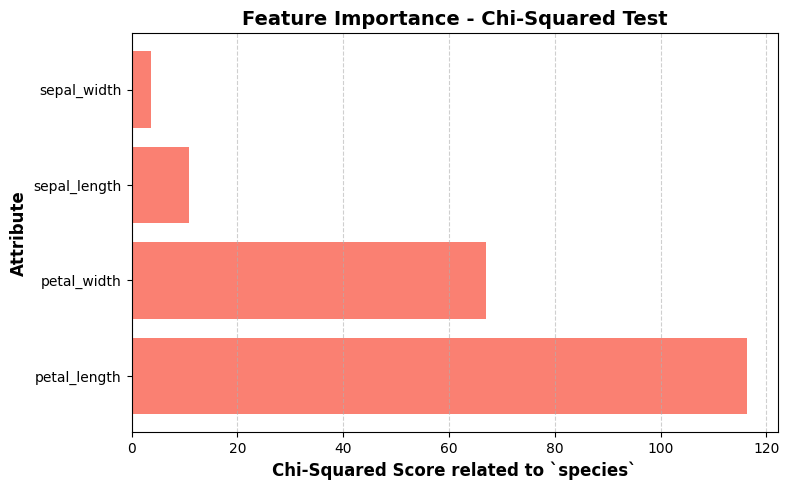

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2

# Supondo que X e y já foram definidos como no código anterior
# X = iris.drop(columns='species')
# y = iris.species

# Calcular os scores Chi-Quadrado
chi2_scores, p_values_chi2 = chi2(X, y)

# Criar uma série pandas com os scores Chi-Quadrado e os nomes das colunas
chi2_series = pd.Series(chi2_scores, index=X.columns)

# Opcional: Ordenar a série para melhor visualização
chi2_series_sorted = chi2_series.sort_values(ascending=False)

# Gerar o gráfico de barras
plt.figure(figsize=(8, 5)) # Define o tamanho da figura

# Usar a série ordenada para plotar
plt.barh(chi2_series_sorted.index, chi2_series_sorted.values, color='salmon')

plt.title('Feature Importance - Chi-Squared Test', fontsize=14, weight='bold')
plt.xlabel('Chi-Squared Score related to `species`', fontsize=12, weight='bold')
plt.ylabel('Attribute', fontsize=12, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adiciona grid no eixo x
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

**2. ANOVA F-value (f_classif)**
Uso:
A ANOVA (Análise de Variância) e seu valor F são usados para avaliar a diferença entre as médias de dois ou mais grupos. No contexto de seleção de atributos, f_classif verifica se há uma diferença estatisticamente significativa nas médias de um atributo numérico para cada categoria da variável alvo. Valores F altos (e p-valores baixos) sugerem que as médias do atributo variam significativamente entre as classes, tornando o atributo relevante para a classificação. É ideal para atributos numéricos e alvos categóricos, como no Iris.

**Código:**

In [9]:
# ANOVA F-value (atributos numéricos, y categórico)
# Importar a função f_classif explicitamente
from sklearn.feature_selection import f_classif

f_scores, p_values_f = f_classif(X, y)

print("\n--- ANOVA F-value ---")
print("Scores F-value por Atributo:")
for i, col in enumerate(X.columns):
    print(f"{col}: {f_scores[i]:.4f} (p-value: {p_values_f[i]:.4f})")

# Para melhor visualização, você pode ordenar:
f_series = pd.Series(f_scores, index=X.columns)
f_series_sorted = f_series.sort_values(ascending=False)
print("\nScores F-value (ordenado):")
print(f_series_sorted)


--- ANOVA F-value ---
Scores F-value por Atributo:
sepal_length: 119.2645 (p-value: 0.0000)
sepal_width: 49.1600 (p-value: 0.0000)
petal_length: 1180.1612 (p-value: 0.0000)
petal_width: 960.0071 (p-value: 0.0000)

Scores F-value (ordenado):
petal_length    1180.161182
petal_width      960.007147
sepal_length     119.264502
sepal_width       49.160040
dtype: float64


Resultados e Explicação em Poucas Linhas:

Resultados: Similar à Informação Mútua e Chi-Quadrado, petal length e petal width exibem os maiores valores F e p-valores praticamente nulos. sepal length tem um valor F menor, e sepal width o menor de todos.
Explicação: Os altos valores F para petal length e petal width demonstram que as médias dessas medidas diferem significativamente entre as três espécies de Iris. Isso significa que esses atributos são excelentes para distinguir as espécies, sendo os mais importantes para a classificação.

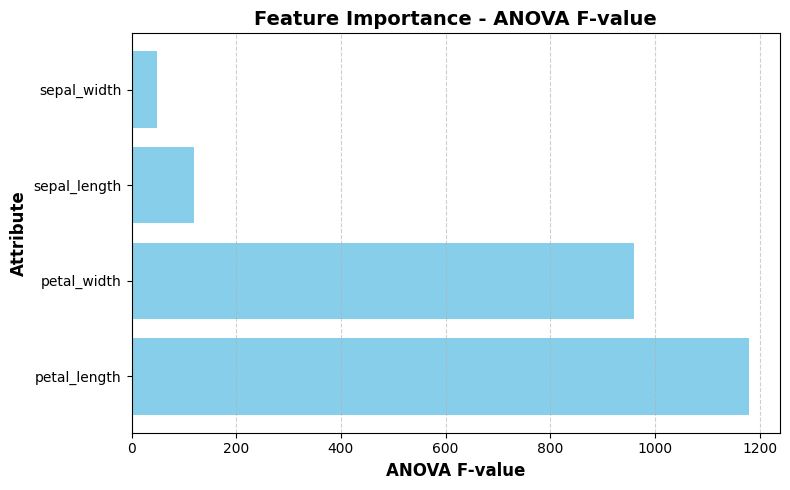

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import f_classif

# Supondo que X e y já foram definidos como no código anterior
# X = iris.drop(columns='species')
# y = iris.species

# Calcular os scores F-value e p-values
f_scores, p_values_f = f_classif(X, y)

# Criar uma série pandas com os scores F-value e os nomes das colunas
f_series = pd.Series(f_scores, index=X.columns)

# Opcional: Ordenar a série para melhor visualização
f_series_sorted = f_series.sort_values(ascending=False)

# Gerar o gráfico de barras
plt.figure(figsize=(8, 5)) # Define o tamanho da figura

# Usar a série ordenada para plotar
plt.barh(f_series_sorted.index, f_series_sorted.values, color='skyblue')

plt.title('Feature Importance - ANOVA F-value', fontsize=14, weight='bold')
plt.xlabel('ANOVA F-value', fontsize=12, weight='bold')
plt.ylabel('Attribute', fontsize=12, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adiciona grid no eixo x
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()